In [71]:
import pandas as pd
df = pd.read_csv("QB_Stats.csv")

In [63]:
df.Age

0       22.0
1       23.0
2       37.0
3       28.0
4       30.0
        ... 
3681    39.0
3682    24.0
3683    22.0
3684    36.0
3685    23.0
Name: Age, Length: 3686, dtype: float64

In [64]:
df.FantasyPoints

0       415.68
1       415.08
2       409.98
3       397.42
4       390.04
         ...  
3681     -7.28
3682     -7.28
3683     -7.44
3684     -8.28
3685    -10.74
Name: FantasyPoints, Length: 3686, dtype: float64

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

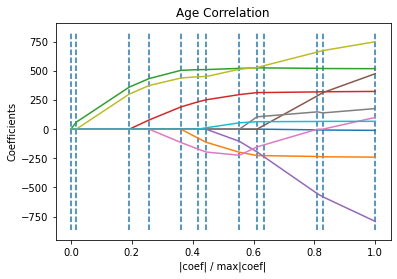

In [86]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('Age Correlation')
plt.axis('tight')
plt.show()